In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preprocessing and Cleaning

In [40]:
def preprocess_data(filepath):
    data = pd.read_csv(filepath)
    data = data.drop(columns=["User ID", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12"], errors='ignore')

    mapping = {
        "Mandala Design Pattern": {"1 (Complex)": 1, "2 (Medium)": 2, "3 (Simple)": 3},
        "Gender": {"Male": 0, "Female": 1, "Other": 2}
    }
    data.replace(mapping, inplace=True)
    return data

# Step 2: Selecting the Right Machine Learning Model


In [41]:
class StressLevelModel:
    def __init__(self):
        self.model = RandomForestClassifier(random_state=42)

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        return accuracy, report, cm

    def tune_hyperparameters(self, X_train, y_train):
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(self.model, param_grid, cv=3, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        self.model = grid_search.best_estimator_
        return grid_search.best_params_

    def save_model(self, filepath):
        joblib.dump(self.model, filepath)

    def load_model(self, filepath):
        self.model = joblib.load(filepath)

    def predict(self, input_data):
        return self.model.predict(input_data)

# Load and preprocess the data


In [42]:
file_path = '/content/drive/MyDrive/dataset.csv'
data = preprocess_data(file_path)

# Split the data


In [43]:
X = data.drop(columns=["Stress Level (1-4)"])
y = data["Stress Level (1-4)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Training Machine Learning Model


In [44]:
stress_model = StressLevelModel()
stress_model.train(X_train, y_train)

# Step 4: Evaluating Model Performance


In [45]:
accuracy, report, cm = stress_model.evaluate(X_test, y_test)
print(f"Initial Accuracy: {accuracy}\n")
print("Classification Report:\n", report)

Initial Accuracy: 0.6584158415841584

Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.67      0.65        52
           2       0.59      0.56      0.57        59
           3       0.63      0.63      0.63        49
           4       0.81      0.81      0.81        42

    accuracy                           0.66       202
   macro avg       0.67      0.67      0.67       202
weighted avg       0.66      0.66      0.66       202



# Plot confusion matrix


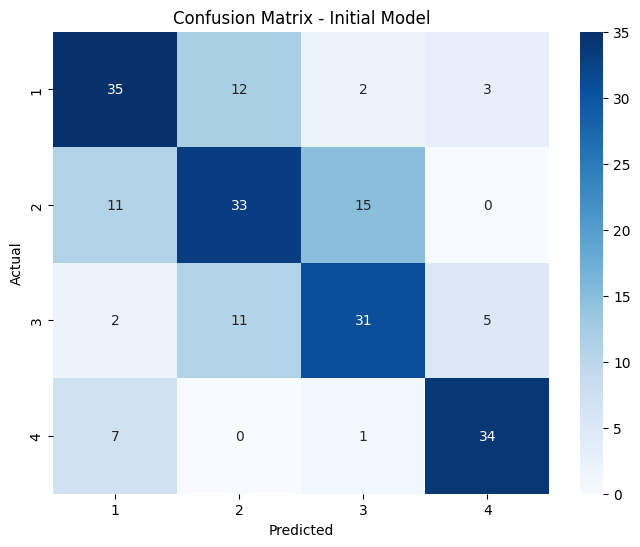

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Initial Model')
plt.show()

# Step 5: Tuning and Optimizing Model


In [47]:
best_params = stress_model.tune_hyperparameters(X_train, y_train)
print("Best Hyperparameters:\n", best_params)

Best Hyperparameters:
 {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


# Evaluate the tuned model


In [48]:
accuracy, report, cm = stress_model.evaluate(X_test, y_test)
print(f"Tuned Accuracy: {accuracy}\n")
print("Tuned Classification Report:\n", report)

Tuned Accuracy: 0.7128712871287128

Tuned Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.79      0.75        52
           2       0.63      0.64      0.64        59
           3       0.69      0.63      0.66        49
           4       0.85      0.81      0.83        42

    accuracy                           0.71       202
   macro avg       0.72      0.72      0.72       202
weighted avg       0.71      0.71      0.71       202



# Plot confusion matrix for tuned model


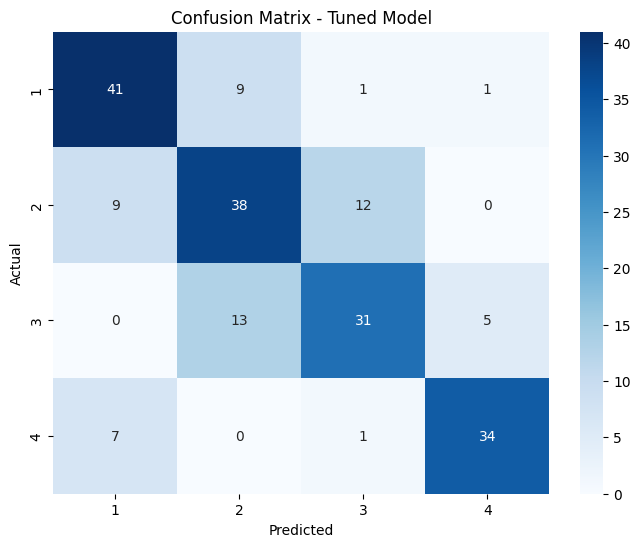

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Model')
plt.show()

# Step 6: Deploying the Model and Making Predictions


In [50]:
model_path = '/content/drive/MyDrive/Models/stress_level_model.joblib'
stress_model.save_model(model_path)
print(f"Model saved to {model_path}")

Model saved to /content/drive/MyDrive/Models/stress_level_model.joblib
